#Import Pandas

In [123]:
import pandas as pd

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [124]:
sales = pd.read_csv('home_data.csv')

In [125]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [126]:
import matplotlib.pyplot as plt

In [127]:
x=sales.iloc[:,5]
y=sales.iloc[:,2]


In [128]:
y.shape,x.shape

((21613L,), (21613L,))

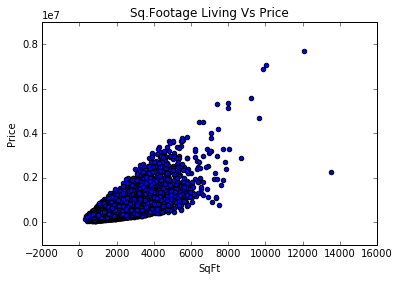

In [129]:
plt.scatter(x,y)
plt.title('Sq.Footage Living Vs Price')
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.show()

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [130]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

##Build the regression model using only sqft_living as a feature

In [131]:
train_x.shape,train_y.shape

((17290L,), (17290L,))

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [133]:
model.fit(train_x.to_frame(),train_y.to_frame())
pred_y = model.predict(test_x.to_frame())
##sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

#Evaluate the simple model

In [134]:
pred_y

array([[  779928.58082545],
       [  642188.3041724 ],
       [  661865.4865514 ],
       ..., 
       [  251455.68264639],
       [ 1134117.86364758],
       [  715274.98158014]])

In [135]:
print test_y.mean()

539864.889891


In [136]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(test_y,pred_y)))
#print model.evaluate(test_data)

259096.668365


RMSE of about \$255,644!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [137]:
%matplotlib inline

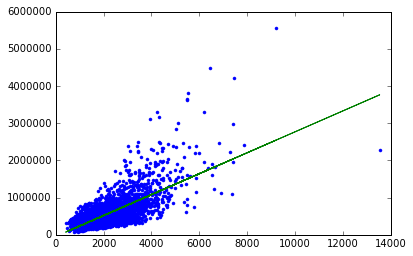

In [138]:
plt.plot(test_x,test_y,'.',
        test_x,model.predict(test_x.to_frame()),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [139]:
model.coef_
model.intercept_

array([-43702.05303872])

#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [140]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [141]:
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
5,4,4.50,5420,101930,1.0,98053
6,3,2.25,1715,6819,2.0,98003
7,3,1.50,1060,9711,1.0,98198
8,3,1.00,1780,7470,1.0,98146
9,3,2.50,1890,6560,2.0,98038


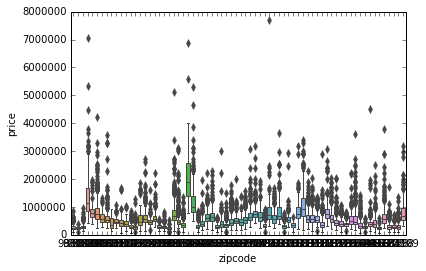

In [142]:
import seaborn as sns
#sns.load_dataset("sales")
sns.boxplot(x='zipcode',y='price',data = sales)

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [143]:
my_features_model = LinearRegression()

my_features_model = my_features_model.fit(train_x.to_frame(),train_y.to_frame())



In [144]:
my_features_pred = my_features_model.predict(test_y.to_frame())
my_features_pred

array([[  1.24348417e+08],
       [  1.88857249e+08],
       [  1.89700557e+08],
       ..., 
       [  9.83422098e+07],
       [  3.23224294e+08],
       [  1.32074522e+08]])

In [145]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


##Comparing the results of the simple model with adding more features

In [146]:
print np.sqrt(metrics.mean_squared_error(test_y,pred_y))
print np.sqrt(metrics.mean_squared_error(test_y,my_features_pred))

259096.668365
182802974.579


The RMSE goes down from \$255,170 to \$181,272 with more features.